In [1]:
import numpy as np

import matplotlib.pyplot as plt
from cobaya.yaml import yaml_load_file
import cobaya.model
%matplotlib inline
import importlib, sys


In [4]:
info_from_yaml = yaml_load_file("/home/fverdian/cobaya/FRA-params/AxiCLASS_Q0_withbx.yaml")
info_from_yaml['likelihood']['pbjboss']['python_path']='/home/fverdian/cobaya/pbj4cobaya/'
info_from_yaml['likelihood']['pbjboss']['pbj_path']='/home/fverdian/cobaya/pbj-multiz/'
info_from_yaml['likelihood']['pbjboss']['likelihood']['store_theorydict']=True

ma = -22
info_from_yaml['params']['m_axion_eV']={'value':pow(10.,ma),'drop':True}

model_pbj = cobaya.model.get_model(info_from_yaml)

[model] *WARNING* Ignored blocks/options: ['sampler', 'output']
[classy] `classy` module loaded successfully from /home/fverdian/anaconda3/lib/python3.10/site-packages
[info] The linear power spectrum will be computed with cobaya
[info]  Using scale dependent f
[info] Infrared resummation: True, kind: EH
[info] Alcock-Paczynski distortions: True
[pbjboss] Observables: ['P0', 'P2', 'P4', 'Q0']


[pbjboss] Using model_varied_cosmology_analytic_marg_multiz_withchi as likelihood model function
Setting fx functions
[pbjboss] Analyzing boss at redshifts [0.38 0.38 0.61 0.61]
[pbjboss] Analytically marginalizing on ['bG3', 'c0', 'c2', 'aP', 'e0k2', 'e2k2']


Storing theorydict, althought it makes not much sense with analytical marginalization
Storing theorydict, althought it makes not much sense with analytical marginalization


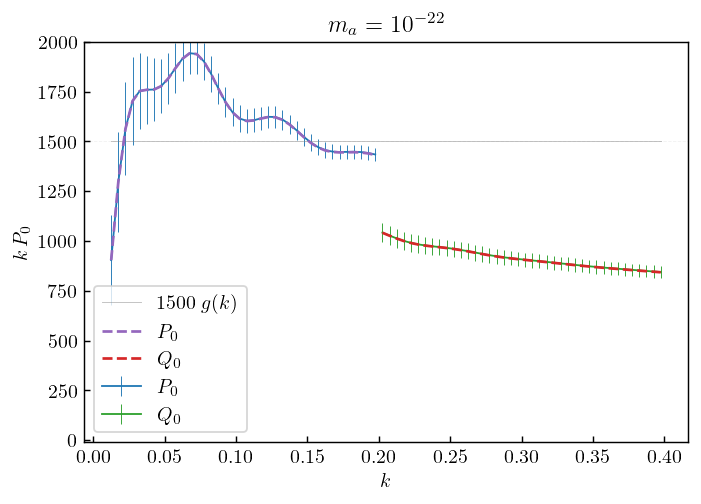

In [5]:

pbjObj = model_pbj.likelihood["pbjboss"].pbjobj
z_bins = pbjObj.z_bins
kCut = pbjObj.kPE[pbjObj.IdxP[0]]
kCutQ0 = pbjObj.kPE[pbjObj.IdxQ0[0]]

%matplotlib inline
plt.figure(figsize=(6,4),dpi=130)

point_pbj = {'omega_scf': 0.01, 'omega_cdm': 0.11,'h': 0.70268995, 'omega_b': 0.023155525, 'logA': 2.8592839,  'b1_ngc_z1': 2., 'b1_sgc_z1': 2., 'b1_ngc_z3': 2., 'b1_sgc_z3': 2.}
zidx = 0
point_pbj.update({'bx_ngc_z1': 0., 'bx_sgc_z1': 0., 'bx_ngc_z3': 0., 'bx_sgc_z3': 0.})
logposterior = model_pbj.logposterior(point_pbj, as_dict=True, cached=False)
P0_cdm = pbjObj.theorydict[zidx]['P0']; Q0_cdm = pbjObj.theorydict[0]['Q0']

var = np.diag(pbjObj.Cov[zidx][:len(kCut),:len(kCut)])
plt.errorbar(kCut, kCut*P0_cdm, yerr=kCut*np.sqrt(var), linewidth=1., label='$P_0$', color='tab:blue',  elinewidth=0.5)
varQ0 = np.diag(pbjObj.Cov[zidx][-len(kCutQ0):,-len(kCutQ0):])
plt.errorbar(kCutQ0, kCutQ0*pbjObj.theorydict[zidx]['Q0'], yerr=kCutQ0*np.sqrt(varQ0), linewidth=1., label='$Q_0$', color='tab:green',  elinewidth=0.5)

g_kPE = pbjObj.g_an(-4*np.log(pbjObj.kPE/pbjObj.kJ0p5))
asymvalue=1.5e3
plt.axhline(asymvalue,linestyle='--', linewidth=0.5, color='grey', alpha=0.1)
plt.plot(pbjObj.kPE, g_kPE*asymvalue,  linewidth=0.5, color='grey', alpha=0.5, label=r'$1500\;g(k)$')


point_pbj.update({'b1_ngc_z1': 0., 'b1_sgc_z1': 0., 'b1_ngc_z3': 0., 'b1_sgc_z3': 0.})
point_pbj.update({'bx_ngc_z1': 2., 'bx_sgc_z1': 2., 'bx_ngc_z3': 2., 'bx_sgc_z3': 2.})
logposterior = model_pbj.logposterior(point_pbj, as_dict=True, cached=False)
plt.plot(kCut, kCut*pbjObj.theorydict[zidx]['P0'], label='$P_0$', color='tab:purple', linestyle='--', zorder=100)
plt.plot(kCutQ0, kCutQ0*pbjObj.theorydict[zidx]['Q0'],color='tab:red',label=r'$Q_0$', linestyle='--', zorder=100)

plt.ylim([-1.e1,2.e3])
plt.xlabel(r'$k$'),plt.ylabel(r'$k\, P_0$')
plt.title(r'$m_a=10^{'+str(ma)+r'}$')
plt.legend()
plt.show()